In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/OS Collected Data/sample/Training'
test_dir = '/content/drive/MyDrive/OS Collected Data/sample/Testing'

img_width, img_height = 150, 150

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1557 images belonging to 3 classes.
Found 390 images belonging to 3 classes.


In [ ]:
# ResNet50 Model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

base_model_resnet.trainable = False

resnet_model = Sequential([
    base_model_resnet,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

resnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
resnet_history = resnet_model.fit(
    train_generator,
    epochs=10,
    callbacks=[EarlyStopping(monitor='loss', patience=3)]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 366s 7s/step - accuracy: 0.3890 - loss: 3.8508
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.4616 - loss: 1.0219
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.4607 - loss: 1.0397
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.4631 - loss: 1.0152
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.4885 - loss: 1.0147
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step - accuracy: 0.4778 - loss: 1.0064
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.5140 - loss: 0.9895
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.4793 - loss: 0.9948
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 205s 4s/step - accuracy: 0.4760 - loss: 0.9949
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.4886 - loss: 0.9895


In [ ]:
test_loss, test_acc = resnet_model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.5159 - loss: 0.9157
Test accuracy: 0.4923076927661896


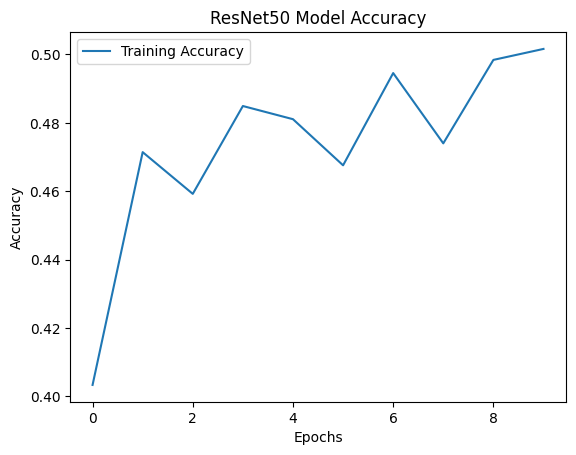

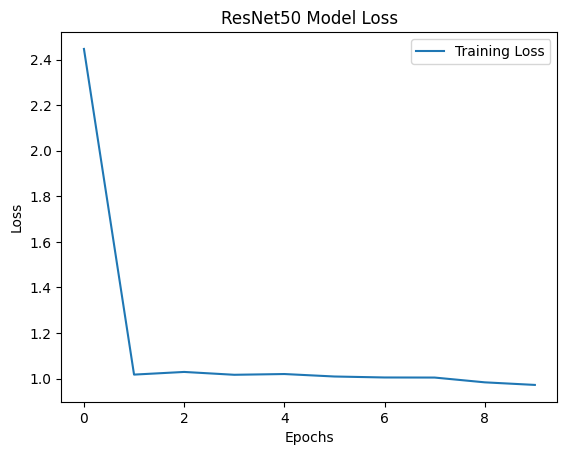

In [ ]:
# Plot ResNet history
import matplotlib.pyplot as plt

def plot_resnet_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('ResNet50 Model Accuracy')
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('ResNet50 Model Loss')
    plt.show()

plot_resnet_history(resnet_history)

13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step


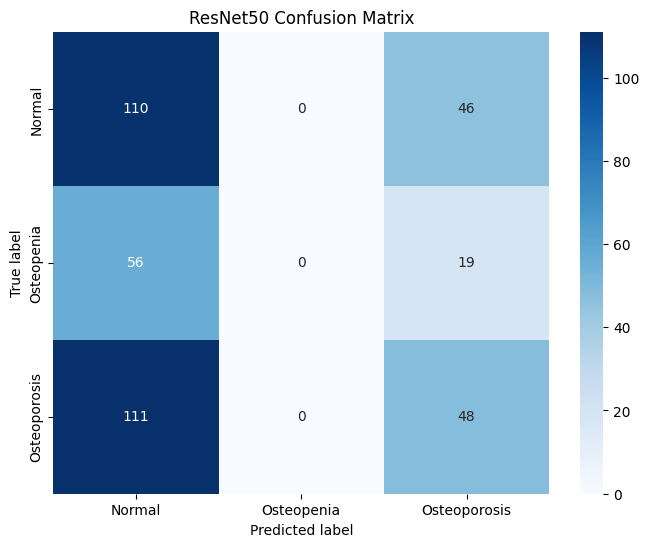

ResNet50 F1 Score: 0.3471246590659714


In [ ]:
# Predictions
y_true = test_generator.classes
y_pred = np.argmax(resnet_model.predict(test_generator), axis=-1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('ResNet50 Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

f1 = f1_score(y_true, y_pred, average='weighted')
print(f"ResNet50 F1 Score: {f1}")